# Index

1. [Data semantics](#sem) 
2. [Data quality evaluation](#qual)
3. [Variables transformation](#trans)
4. [Elimination of redundant variables and duplicates](#elim)
5. [Pairwaise correlation](#corr)
6. [Integration from external data sources](#exts)
7. [Distribution of the variables and statistics](#vis)


<a id='sem'></a>
# Data semantics

In [ ]:
#pip install plotly

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#pyo.init_notebook_mode()

In [ ]:
url = "https://raw.githubusercontent.com/ZioTrib/BDA_project/main/datasets/googleplaystore.csv"

In [ ]:
PlaystoreApp = pd.read_csv(url)

In [ ]:
PlaystoreApp.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
PlaystoreApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
X = PlaystoreApp.values

In [ ]:
X.shape #number of rows and columns

(10841, 13)

Each record is described by 13 variables:

- **App**: application name.

- **Category**: category the app belongs to.

- **Rating**: app evaluation (between 1.0 and 5.0).

- **Reviews**: number of reviews for the app.

- **Size**: app dimension.

- **Installs**: number of download for app.

- **Type**: paid or free.

- **Price**: price of the app.

- **Content Rating**: age group the app is targeted at.

- **Genres**: main category + secondary categories.

- **Last Updated**: date when the app was last updated on Play Store.

- **Current Ver**: current version of the app.

- **Android Ver**: minimum required Android version

<a id='qual'></a>
# Data quality evaluation

In [ ]:
PlaystoreApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
PlaystoreApp['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Check and correction of the value isn't in the domain of 'Category'

In [ ]:
#checking index and value in the incorrect form
for i,value in enumerate(PlaystoreApp['Category']):
    try:
        float(value)
        print('Record position: ', i, '; Corresponding value: ', value)
    except ValueError:
        pass

Record position:  10472 ; Corresponding value:  1.9


In [ ]:
#access the row to check the problem
PlaystoreApp.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [ ]:
#mismatch correction
appName = PlaystoreApp.iloc[10472][0] 
PlaystoreApp.iloc[10472] = PlaystoreApp.iloc[10472][1:].shift(periods=1)
PlaystoreApp.at[10472,'App'] = appName
PlaystoreApp.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [ ]:
#checking 'Rating' data type
PlaystoreApp['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

'Rating' has to be a float, but the system interpreted it as an object.

In [ ]:
#'Rating' type transformation from string to float
PlaystoreApp['Rating'] = PlaystoreApp['Rating'].astype('float64')

In [ ]:
#checking float type for all values in 'Rating'
PlaystoreApp['Rating'].dtypes

dtype('float64')

In [ ]:
#checking 'Reviews' data type
PlaystoreApp['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

'Reviews' has to be a integer, but the system interpreted it as an object.

In [ ]:
#'Reviews' type transformation from string to int
PlaystoreApp['Reviews'] = PlaystoreApp['Reviews'].astype('int64')

In [ ]:
#checking float type for all values in 'Reviews'
PlaystoreApp['Reviews'].dtypes

dtype('int64')

In [ ]:
PlaystoreApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
PlaystoreApp['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
PlaystoreApp['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
PlaystoreApp['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
PlaystoreApp['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
PlaystoreApp['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
PlaystoreApp['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
PlaystoreApp['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
#checking if 'Last Updated' is in date format 
import datetime
for i,value in enumerate(PlaystoreApp['Last Updated']):
    try:
        isinstance(value,datetime.date)
        pass
    except ValueError:
        print(i,value)

In [ ]:
PlaystoreApp['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
#checking if 'Current Ver' is in the version number format
from packaging.version import LegacyVersion
for i,value in enumerate(PlaystoreApp['Current Ver']):
    try:
        LegacyVersion(value)
        pass
    except:
        print(i,value)

In [ ]:
PlaystoreApp['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## Missing values detection

In [ ]:
PlaystoreApp.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
#remove record tha thas missing value in the target variable
PlaystoreApp = PlaystoreApp[PlaystoreApp['Rating'].isnull() == False].reset_index(drop = True)

Replacing 'Category' missing value with the mode grouped by 'Content Rating' and 'Size'

In [ ]:
PlaystoreApp[['Category', 'Genres']][PlaystoreApp['Category'].isnull()==True]

,Category,Genres
9117,NaN,NaN


In [ ]:
PlaystoreApp.loc[9117]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 9117, dtype: object

In [ ]:
#filtering by 'Content Rating' and 'Size'
pd.set_option('display.max_rows', 5100)
everyone = PlaystoreApp[(PlaystoreApp['Content Rating']=='Everyone') & (PlaystoreApp['Size']=='3.0M')]
everyone['Category'].groupby([everyone['Genres'], everyone['Category']]).count()

Genres                   Category           
Board                    GAME                    1
Books & Reference        BOOKS_AND_REFERENCE     2
Business                 BUSINESS                1
Casual                   FAMILY                  1
Communication            COMMUNICATION           1
Education                EDUCATION               1
                         FAMILY                  1
Entertainment            FAMILY                  2
Finance                  FINANCE                 1
Lifestyle                LIFESTYLE               4
Maps & Navigation        MAPS_AND_NAVIGATION     1
Medical                  MEDICAL                 1
News & Magazines         NEWS_AND_MAGAZINES      2
Personalization          PERSONALIZATION         3
Photography              PHOTOGRAPHY             2
Productivity             PRODUCTIVITY            1
Role Playing             FAMILY                  1
Sports                   SPORTS                  2
Tools                    TOOLS       

In [ ]:
PlaystoreApp['Category'].fillna(everyone['Category'].mode()[0], inplace = True)
PlaystoreApp['Category'].isnull().sum()

0

In [ ]:
PlaystoreApp['Genres'].fillna(everyone['Genres'].mode()[0], inplace = True)
PlaystoreApp['Genres'].isnull().sum()

0

Replacing 'Current Ver' missing values with the mode grouped by 'Last Updated' and 'Android Ver'

In [ ]:
PlaystoreApp[['Last Updated', 'Android Ver']][PlaystoreApp['Current Ver'].isnull()==True]

,Last Updated,Android Ver
15,"June 6, 2018",4.2 and up
1473,"February 12, 2013",1.5 and up
5866,"May 10, 2017",4.0 and up
6578,"April 18, 2018",4.0 and up


In [ ]:
#filtering by 'Last Updated' and 'Android Ver'
from scipy import stats
 
subset_c = PlaystoreApp[['Current Ver','Last Updated','Android Ver']]
 
#compute the mode group by 'Last Updated' and 'Android Ver'
modes_c = subset_c.groupby([pd.to_datetime(PlaystoreApp['Last Updated']).dt.to_period('M'),PlaystoreApp['Android Ver']])['Current Ver'].apply(stats.mode)
modes_c
 
#unique combined values
la_without_current = PlaystoreApp[PlaystoreApp['Current Ver'].isna()][pd.unique(['Last Updated','Android Ver'])]
la_without_current['Last Updated'] = pd.to_datetime(la_without_current['Last Updated']).dt.to_period('M')
la_without_current = la_without_current.to_numpy()
la_without_current
 
#replace NaN using the computed mode
for la in la_without_current:
  mask = (pd.to_datetime(PlaystoreApp['Last Updated']).dt.to_period('M') == la[0]) & (PlaystoreApp['Android Ver'] == la[1])
  mode = modes_c[la[0]][la[1]][0][0]
  PlaystoreApp.loc[mask, 'Current Ver'] = PlaystoreApp.loc[mask, 'Current Ver'].fillna(mode)
 
PlaystoreApp['Current Ver'].isnull().sum()

0

Replacing 'Android Ver' missing values according to mode by 'Last Updated'

In [ ]:
PlaystoreApp[['Last Updated', 'Android Ver']][PlaystoreApp['Android Ver'].isnull()==True]

,Last Updated,Android Ver
4280,"July 20, 2018",NaN
4308,"March 27, 2018",NaN


In [ ]:
#filtering by 'Last Updated'
subset_a = PlaystoreApp[['Last Updated','Android Ver']]
 
#compute the mode group by 'Last Updated'
modes_a = subset_a.groupby(pd.to_datetime(PlaystoreApp['Last Updated']).dt.to_period('M'))['Android Ver'].apply(stats.mode)
modes_a
 
#unique values
l_without_android = PlaystoreApp[PlaystoreApp['Android Ver'].isna()][pd.unique('Last Updated')]
l_without_android['Last Updated'] = pd.to_datetime(l_without_android['Last Updated']).dt.to_period('M')
l_without_android = l_without_android.to_numpy().reshape(-1)
l_without_android
 
#replace NaN using the computed mode
for l in l_without_android:
  mask = (pd.to_datetime(PlaystoreApp['Last Updated']).dt.to_period('M') == l) 
  mode = modes_a[l][0][0]
  PlaystoreApp.loc[mask, 'Android Ver'] = PlaystoreApp.loc[mask, 'Android Ver'].fillna(mode)
 
PlaystoreApp['Android Ver'].isnull().sum()

0

In [ ]:
PlaystoreApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   int64  
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9367 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9367 non-null   object 
 12  Android Ver     9367 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 951.5+ KB


<a id='trans'></a>
# Variables transformation

### Size transformation

In order to have a common unit of measurement for all values, all the values of the Size attribute ,that had the **Kilobyte** as unit of measurement, have been converted to **Megabyte**. In case the dimension was found to be "*Varies with device*", it was attributed zero value to the reference record.


 

In [ ]:
PlaystoreApp['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
def kb2Mb(dfarray):
  #transform kb2Mb and assign 0 if value is "Varies with device"
  new_size = []
  for size in dfarray:
    lenght = len(size)
    if size[lenght-1] == "k":
      size_kb = float(size[:-1])
      size_kb_to_Mb = size_kb/1000
      new_size.append(size_kb_to_Mb)
    elif size[lenght-1] == "M":
      size_Mb = float(size[:-1])
      new_size.append(size_Mb)
    else:
      new_size.append(0)
  return new_size
 
convertion = kb2Mb(PlaystoreApp['Size'])

In [ ]:
PlaystoreApp["Size"] = convertion

### Price transformation
In order to make a plot visualization of the Price attribute, it has been transformed into a **FLOAT** variable. The dollar sign has also been removed.

In [ ]:
PlaystoreApp["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
price_no_dollar = []
for price in PlaystoreApp["Price"]:
  if price[0] == "$":
    price_no_dollar.append(float(price[1:]))
  else:
    price_no_dollar.append(float(price))

In [ ]:
PlaystoreApp["Price"] = price_no_dollar

Need to check if in any records Type = 'Free' corresponds to Price = 0

In [ ]:
print('App that is free, but has price not equal to 0: \n', PlaystoreApp['App'][(PlaystoreApp['Type'] == 'Free') & (PlaystoreApp['Price'] != 0)])
print()
print('App that is paid, but has price equal to 0: \n', PlaystoreApp['App'][(PlaystoreApp['Type'] == 'Paid') & (PlaystoreApp['Price'] == 0)])

App that is free, but has price not equal to 0: 
 Series([], Name: App, dtype: object)

App that is paid, but has price equal to 0: 
 Series([], Name: App, dtype: object)


Notice that some prices are too much than the others

In [ ]:
#investigate the most expensive 'Category', that can be possible outliers
PlaystoreApp[PlaystoreApp['Price']>=79.99].groupby('Price')['Category'].value_counts()

Price   Category 
79.99   MEDICAL      2
299.99  LIFESTYLE    1
379.99  LIFESTYLE    1
389.99  FAMILY       1
399.99  FINANCE      6
        FAMILY       3
        LIFESTYLE    2
400.00  LIFESTYLE    1
Name: Category, dtype: int64

In [ ]:
#name and category of the app that are outliers wit respect to the price
PlaystoreApp[['App', 'Category']][PlaystoreApp['Price']>=79.99]

,App,Category
2170,Vargo Anesthesia Mega App,MEDICAL
2278,Vargo Anesthesia Mega App,MEDICAL
4038,most expensive app (H),FAMILY
4191,💎 I'm rich,LIFESTYLE
4196,I'm Rich - Trump Edition,LIFESTYLE
5046,I am rich,LIFESTYLE
5049,I am Rich Plus,FAMILY
5050,I am rich VIP,LIFESTYLE
5051,I Am Rich Premium,FINANCE
5052,I am extremely Rich,LIFESTYLE


### Genres Split

'Genres' splits into Main and Secondary genres 

In [ ]:
PlaystoreApp[['Main_Genres','Secondary_Genres']]=PlaystoreApp.Genres.str.split(';',expand=True,)

In [ ]:
#missing values are not real ones because apps cannot have a secondary genre
PlaystoreApp['Secondary_Genres'].fillna('None', inplace = True)

In [ ]:
PlaystoreApp['Secondary_Genres'].isnull().sum()

0

In [ ]:
PlaystoreApp[PlaystoreApp['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genres,Secondary_Genres
7341,DC Universe Online Map,TOOLS,4.1,1186,6.4,"50,000+",Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,Tools,None


There is only one record that has 'Content Rating'=='Unrated'

In [ ]:
#substitute 'Unrated' with the mode according to 'Main_Genres', handling it as a noise
tools = PlaystoreApp[PlaystoreApp['Main_Genres']=='Tools']
mode_main = tools.groupby('Content Rating')['Main_Genres'].count()
PlaystoreApp['Content Rating'].replace('Unrated', mode_main.index[0], inplace = True)

### Installs trasformation

'Installs' transformation in the correct intervals

In [ ]:
PlaystoreApp['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
#remove '+' symbol and cut into intervals
Installs_int = []
for downloads in PlaystoreApp['Installs']:
  y = downloads[:-1].replace(",","")
  Installs_int.append(int(y) + 1)
 
PlaystoreApp['Installs'] = pd.cut(Installs_int, [1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000,5000000000])
PlaystoreApp['Installs'].value_counts()

(1000000, 5000000]          1577
(10000000, 50000000]        1252
(100000, 500000]            1150
(10000, 50000]              1010
(5000000, 10000000]          752
(1000, 5000]                 714
(500000, 1000000]            538
(50000, 100000]              467
(5000, 10000]                432
(100000000, 500000000]       409
(100, 500]                   309
(50000000, 100000000]        289
(500, 1000]                  201
(500000000, 1000000000]       72
(10, 50]                      69
(1000000000, 5000000000]      58
(50, 100]                     56
(5, 10]                        9
(1, 5]                         3
Name: Installs, dtype: int64

Need to check if there are a number of 'Reviews' greater than the number of corresponding 'Installs', because only people who installed an app can reviews the app. 

In [ ]:
for i, x in enumerate(PlaystoreApp['Installs']):
  if PlaystoreApp['Reviews'][i] > x.right:
    print(PlaystoreApp['Reviews'][i], x)

### Data time convertion

In [ ]:
from datetime import datetime

'Last Updated' trasformation into datetime format, considering only month and year

In [ ]:
PlaystoreApp['Last Updated'] = pd.to_datetime(PlaystoreApp['Last Updated']).dt.strftime('%m-%Y')
PlaystoreApp['Last Updated']

0       01-2018
1       01-2018
2       08-2018
3       06-2018
4       06-2018
         ...   
9362    06-2017
9363    07-2017
9364    07-2018
9365    01-2015
9366    07-2018
Name: Last Updated, Length: 9367, dtype: object

In [ ]:
PlaystoreApp['Last Updated'].unique()

array(['01-2018', '08-2018', '06-2018', '03-2017', '04-2018', '09-2017',
       '07-2018', '10-2017', '11-2017', '03-2018', '08-2017', '05-2018',
       '12-2017', '08-2014', '10-2016', '02-2018', '07-2017', '07-2015',
       '10-2014', '08-2016', '04-2016', '09-2015', '05-2017', '04-2017',
       '11-2016', '02-2015', '06-2016', '07-2014', '09-2016', '01-2017',
       '02-2017', '02-2016', '06-2017', '07-2016', '08-2015', '06-2015',
       '04-2015', '12-2013', '05-2016', '12-2016', '01-2015', '12-2015',
       '06-2012', '03-2016', '03-2015', '05-2015', '10-2015', '03-2013',
       '01-2012', '06-2011', '02-2013', '04-2014', '11-2014', '05-2013',
       '12-2014', '11-2012', '11-2013', '09-2014', '07-2013', '10-2013',
       '01-2016', '05-2014', '06-2014', '09-2013', '11-2015', '01-2014',
       '04-2013', '08-2013', '12-2011', '02-2014', '09-2012', '10-2012',
       '01-2013', '05-2011', '06-2013', '09-2011', '03-2014', '04-2012',
       '07-2012', '02-2012', '08-2012', '07-2011', 

## New variable creation


1. '*Is_Family*': value 0 if it isn't an application that falls into the Family category, otherwise 1.
2. '*Is_Game*': value 0 if it isn't a game, otherwise 1.<br>
The choice to divide the 'Category' and create two new attributes is also based on the Google App's structure.


'Is_Family' variable creation

In [ ]:
IsFamily = []
for category in PlaystoreApp['Category']:
  if category == 'FAMILY':
    IsFamily.append(1)
  else:
    IsFamily.append(0)

In [ ]:
PlaystoreApp['Is_Family'] = IsFamily

'Is_Game' variable creation

In [ ]:
IsGame = []
for category in PlaystoreApp['Category']:
  if category == 'GAME':
    IsGame.append(1)
  else:
    IsGame.append(0)

In [ ]:
PlaystoreApp['Is_Game'] = IsGame

'Compatibility' variable creation

In [ ]:
PlaystoreApp[PlaystoreApp['Android Ver'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genres,Secondary_Genres,Is_Family,Is_Game
41,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,0.000,"(10000000, 50000000]",Free,0.00,Everyone,Art & Design,07-2018,Varies with device,Varies with device,Art & Design,None,0,0
51,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,0.000,"(1000000, 5000000]",Free,0.00,Everyone,Auto & Vehicles,07-2018,Varies with device,Varies with device,Auto & Vehicles,None,0,0
66,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,0.000,"(5000000, 10000000]",Free,0.00,Everyone,Auto & Vehicles,07-2018,Varies with device,Varies with device,Auto & Vehicles,None,0,0
67,REPUVE,AUTO_AND_VEHICLES,3.9,356,0.000,"(100000, 500000]",Free,0.00,Everyone,Auto & Vehicles,05-2018,Varies with device,Varies with device,Auto & Vehicles,None,0,0
84,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,0.000,"(1000000, 5000000]",Free,0.00,Everyone,Auto & Vehicles,08-2018,Varies with device,Varies with device,Auto & Vehicles,None,0,0
87,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,0.000,"(1000000, 5000000]",Free,0.00,Everyone,Auto & Vehicles,08-2018,Varies with device,Varies with device,Auto & Vehicles,None,0,0
88,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,0.000,"(100000, 500000]",Free,0.00,Everyone,Auto & Vehicles,05-2018,4.6.5,Varies with device,Auto & Vehicles,None,0,0
101,Mirror - Zoom & Exposure -,BEAUTY,3.9,32090,0.000,"(1000000, 5000000]",Free,0.00,Everyone,Beauty,10-2016,Varies with device,Varies with device,Beauty,None,0,0
108,Selfie Camera,BEAUTY,4.2,17934,0.000,"(1000000, 5000000]",Free,0.00,Everyone,Beauty,09-2017,Varies with device,Varies with device,Beauty,None,0,0
115,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715,0.000,"(10000000, 50000000]",Free,0.00,Everyone,Beauty,08-2017,Varies with device,Varies with device,Beauty,None,0,0


In [ ]:
compatibility = []
for row in PlaystoreApp['Android Ver']:
    if row == 'Varies with device':
        compatibility.append(row)
    elif '1' in row[0] or '2' in row[0] or row == '4.4W and up':
        compatibility.append('High')
    elif '7' in row[0] or '8' in row[0] or row == '5.0 - 6.0':
        compatibility.append('Low')
    else:
        compatibility.append('Medium')

In [ ]:
PlaystoreApp['Compatibility'] = compatibility

'RTR' variable creation

In [ ]:
from statistics import mean
# RTR creation as Reviews/avg(Installs rate)
installs = PlaystoreApp['Installs']
reviews = PlaystoreApp['Reviews']
RTR = []
for i in range(len(PlaystoreApp['Installs'])):
    x = reviews[i]/mean([installs[i].right, installs[i].left])
    RTR.append(x)

In [ ]:
PlaystoreApp['RTR'] = RTR

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
PlaystoreApp['RTR'] = scaler.fit_transform(np.array(PlaystoreApp['RTR']).reshape(-1,1))

In [ ]:
PlaystoreApp['RTR'].unique()

array([0.00397336, 0.00096535, 0.00874936, ..., 0.00298585, 0.0284984 ,
       0.00995604])

<a id='elim'></a>
# Elimination of redundant variables and duplicates

### Elimination of redundant variables

In [ ]:
#drop the 'Category' attribute because of 'IsFamily' and 'IsGame' creation and drop 'Type' because of redundance
PlaystoreApp = PlaystoreApp.drop(columns = ['Category', 'Type','Genres'])
PlaystoreApp.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver,Main_Genres,Secondary_Genres,Is_Family,Is_Game,Compatibility,RTR
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,"(10000, 50000]",0.0,Everyone,01-2018,1.0.0,4.0.3 and up,Art & Design,None,0,0,Medium,0.003973
1,Coloring book moana,3.9,967,14.0,"(500000, 1000000]",0.0,Everyone,01-2018,2.0.0,4.0.3 and up,Art & Design,Pretend Play,0,0,Medium,0.000965
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,"(5000000, 10000000]",0.0,Everyone,08-2018,1.2.4,4.0.3 and up,Art & Design,None,0,0,Medium,0.008749
3,Sketch - Draw & Paint,4.5,215644,25.0,"(50000000, 100000000]",0.0,Teen,06-2018,Varies with device,4.2 and up,Art & Design,None,0,0,Medium,0.002155
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,"(100000, 500000]",0.0,Everyone,06-2018,1.1,4.4 and up,Art & Design,Creativity,0,0,Medium,0.002416


### Handling duplicates

In [ ]:
PlaystoreApp['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
ESPN                                                 7
Candy Crush Saga                                     7
                                                    ..
Axxess AX-DSP                                        1
Brain Waves - Binaural Beats                         1
Hitwe - meet people and chat                         1
Univision Deportes: Liga MX, MLS, Fútbol En Vivo     1
Axe Man                                              1
Name: App, Length: 8197, dtype: int64

In [ ]:
PlaystoreApp = PlaystoreApp.sort_values(by=['App', 'Reviews'], ascending=False)

In [ ]:
PlaystoreApp.drop_duplicates(subset = 'App', keep = 'first', inplace = True)

In [ ]:
PlaystoreApp = PlaystoreApp.reset_index(drop = True)

<a id='corr'></a>
# Pairwase correlations

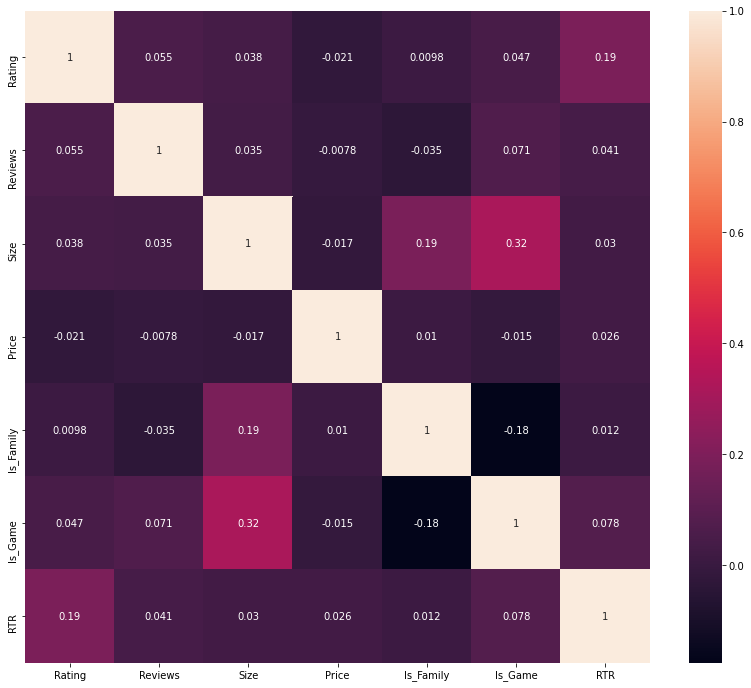

In [ ]:
import seaborn as sns
corr = PlaystoreApp.corr()
plt.subplots(figsize =(14, 12))
hm = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

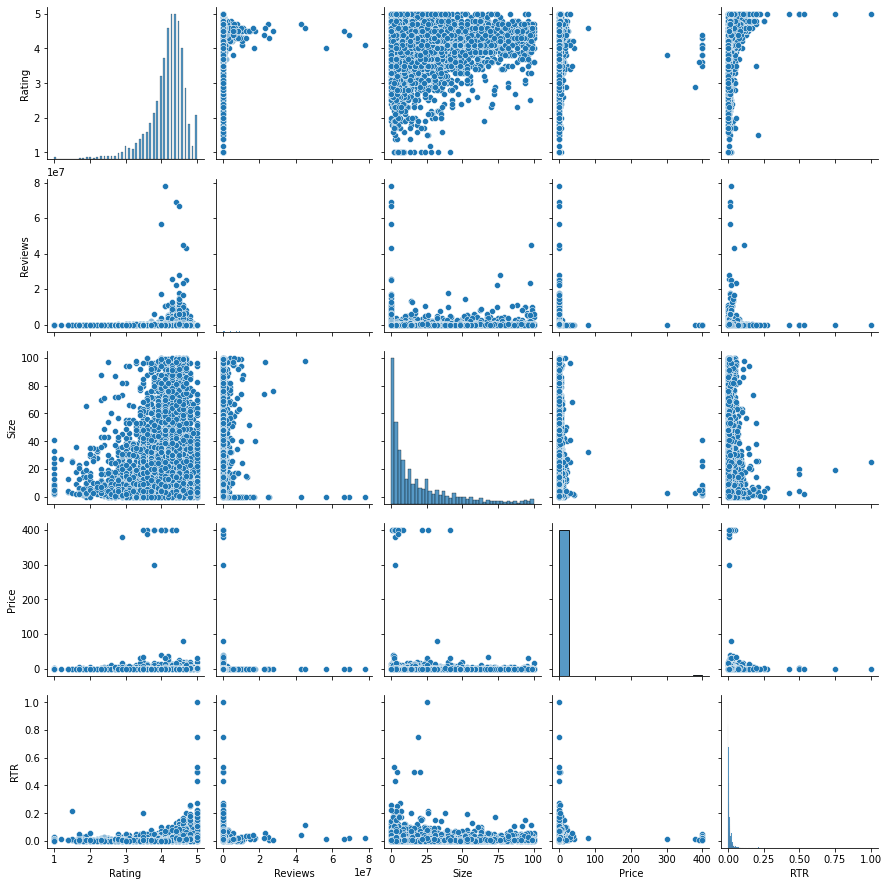

In [ ]:
import seaborn as sns
#g = sns.PairGrid(PlaystoreApp[['Rating', 'Reviews', 'Size', 'Price', 'RTR']], diag_sharey=False)
sns.pairplot(PlaystoreApp[['Rating', 'Reviews', 'Size', 'Price', 'RTR']])

<a id='exts'></a>
# Integration from external sources

Integration of Apple Apps dataset, found on Kaggle (https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps?select=appleStore_description.csv)

In [ ]:
#Read Apple CSV and modify App in uppercase
ApplestoreApp = pd.read_csv('https://raw.githubusercontent.com/ZioTrib/BDA_project/main/datasets/AppleStore.csv ')
ApplestoreApp = ApplestoreApp.rename(columns={"track_name": "App"})
ApplestoreApp['App'] = ApplestoreApp['App'].str.upper()

In [ ]:
PlaystoreApp['App'] = PlaystoreApp['App'].str.upper()

In [ ]:
#create 'Both_Stores' to use after merging
ApplestoreApp['Both_Stores'] = 1

In [ ]:
ApplestoreApp['Both_Stores'].dtypes

dtype('int64')

In [ ]:
#Merge two dataset: Playstore and Applestore (considering only the app name and 'Both_Stores')
df_joined = pd.merge(PlaystoreApp, ApplestoreApp[['App', 'Both_Stores']], on='App', how='left')
df_joined.isnull().sum()

App                    0
Rating                 0
Reviews                0
Size                   0
Installs               0
Price                  0
Content Rating         0
Last Updated           0
Current Ver            0
Android Ver            0
Main_Genres            0
Secondary_Genres       0
Is_Family              0
Is_Game                0
Compatibility          0
RTR                    0
Both_Stores         7860
dtype: int64

In [ ]:
#missing values in 'Both_Stores' are that apps that are not in ApplestoreApp
df_joined['Both_Stores'].fillna(0, inplace = True)

In [ ]:
#after creation, 'Both_Stores' is read as a float
df_joined['Both_Stores'] = df_joined['Both_Stores'].astype('int64')

In [ ]:
df_joined.to_csv(r'C:\Users\User\Desktop\Università\BigDataAnalytics\data_cleaned.csv', index = False)

<a id='vis'></a>
# Distribution of the variables and statistics

In [ ]:
data = PlaystoreApp['Rating'].value_counts()
fig = px.bar(data, x = data.index, y = data.values,
             color='Rating',
             height=400)
fig.update_layout(xaxis_title = 'Rating', yaxis_title = 'Frequency')
fig.show()
#fig.write_image("Target.png")

In [ ]:
from plotly.subplots import make_subplots

legend = [True,False]  #create legend control
colors = ['#3BCCFF', '#FF3333', '#FFD400', '#48FF48']
fig = go.Figure()

for i, x in enumerate(PlaystoreApp['Is_Family'].unique()):
    df_plot=PlaystoreApp[PlaystoreApp['Is_Family'] == x]
    

    fig.add_trace(go.Box(x = df_plot['Is_Family'], y = df_plot['Rating'],
                         line = dict(color=colors[0]),
                         name = 'Family'*legend[x], showlegend = legend[x]))
    
for i, x in enumerate(PlaystoreApp['Is_Game'].unique()):
    df_plot=PlaystoreApp[PlaystoreApp['Is_Game'] == x]
    

    fig.add_trace(go.Box(x = df_plot['Is_Game'], y = df_plot['Rating'],
                         line=dict(color=colors[1]),
                         name = 'Game'*legend[x], showlegend = legend[x]))
    
for i, x in enumerate(df_joined['Both_Stores'].unique()):
    df_plot=df_joined[df_joined['Both_Stores'] == x]
    

    fig.add_trace(go.Box(x = df_plot['Both_Stores'], y = df_plot['Rating'],
                         line=dict(color=colors[2]),
                         name = 'Both stores'*legend[x], showlegend = legend[x]))

fig.update_layout(title ='Boxplot Rating by \'Family\' and \'Game\' genres and both stores', yaxis_title='Rating', boxmode='group', xaxis_tickvals = [0,1], xaxis_ticktext = ['No', 'Yes'])
                  
fig.show()
#fig.write_image("Boxplots.png")

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(
y = df_joined['Rating'], x = df_joined['Compatibility'],
boxpoints='suspectedoutliers', # only suspected outliers
marker=dict(
color='#7FB3D5',
outliercolor='rgba(219, 64, 82, 0.6)',
line=dict(
outliercolor='rgba(219, 64, 82, 0.6)',
outlierwidth=2)),
line_color='#7FB3D5'
))
fig.update_layout(title ='Boxplot Rating by Compatibility')
pyo.iplot(fig)
#fig.write_image("Compatibility.png") 

In [ ]:
price_aggr = df_joined['Price'].where(df_joined['Price'] == 0, 'Paid')
price_aggr = price_aggr.replace(0, 'Free')
price_aggr.value_counts()

Free    7595
Paid     602
Name: Price, dtype: int64

In [ ]:
fig = px.pie(values = price_aggr.value_counts())
fig.show()
#fig.write_image("Price.png")

In [ ]:
prova_price_no = df_joined[df_joined['Price']==0].groupby(pd.to_datetime(PlaystoreApp['Last Updated']).dt.strftime('%Y'))['RTR'].apply(mean)
prova_price_si = df_joined[df_joined['Price']!=0].groupby(pd.to_datetime(PlaystoreApp['Last Updated']).dt.strftime('%Y'))['RTR'].apply(mean)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Free', x = prova_price_no.index, y = prova_price_no.values),
    go.Bar(name='Paid', x = prova_price_si.index, y = prova_price_si.values)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()
#fig.write_image("PriceRTR.png")